In [1]:
"""
Script for the simulation of phase transitions in argon atoms.
This script is written for the first project of the course Computational Physics at the faculty of Applied Physics, TU Delft
by Olaf C. Dreijer (4296621), Maxim Q. Capelle (4268628) and Wouter Kessels (4201248).

main.ipynb runs the complete simulation. The folder init contains non-tunable parameters and functions to create an initial state.
The folder comp contains all functions for the evolution calculations.
The folder post contains all functions for errorestimation, validation and visualisation.
"""

""" ----------------- IMPORT MODULES ----------------- """
%matplotlib inline
import numpy as np
import math
import random
from IPython.display import HTML

from init.parameters import *
from execute import *

In [2]:
""" ----------------- PARAMETERS ----------------- """
# SYSTEM PARAMETERS
N_argon       = 108             # Number of particles (4, 32, 108, 256, 500, 864)
density_ph    = 0.88/(sigma**3) # Particle density (m^-3)
N_steps       = 1000            # Number of timesteps for output
h_ph          = 2.15E-15        # Time step (s)
T_init_ph     = T_ref           # Initial temperature (Kelvin)
T_final_ph    = T_ref           # Final temperature (Kelvin)


# EXPERIMENT PARAMETERS
init_org      = "fcc"           # Organization of the initial particle positions (string)
                                # Either "fcc":   initialize particles in an fcc lattice
                                # or     "cubic": initializes particles in a cubic lattice, randomly distributed
T_delta_ph    = 50              # Temperature step for downscaling (Kelvin)
N_steps_set_T = 20              # Number of timesteps between temperature transitions
N_steps_av_E  = 5               # Number of timesteps over which the last kinetic energies are averaged for new temperature transition

# PLOTTING PARAMETERS
plot_unit = 'physical'           # Units for graphical representation of observables. Either "natural" or "physical"

Calculations started...
Energy:     std = 2.86e-03 | mean = -1.15e+02
Kinetic:    std = 3.35e+00 | mean = 4.75e+01
Potential:  std = 3.35e+00 | mean = -1.62e+02
Pressure:   std = 2.31e+01 | mean = 6.98e+01
CV/N_argon: std = 1.99e-03 | mean = 1.50e+00

... calculations successfully finished.


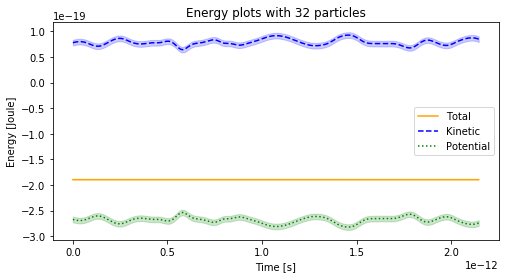

Mean total energy = -1.15e+02 [-] = -1.90e-19 [J]
Std  total energy = 2.86e-03 [-] = 4.73e-24 [J]



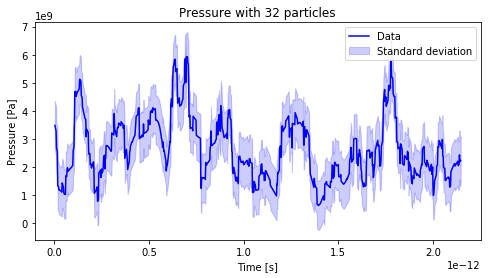

Mean pressure = 6.98e+01 [-] = 2.64e+09 [Pa]
Std  pressure = 2.31e+01 [-] = 8.71e+08 [Pa]
Pressure according to time-average formula = 4.45e+00 [-] = 1.68e+08 [Pa]



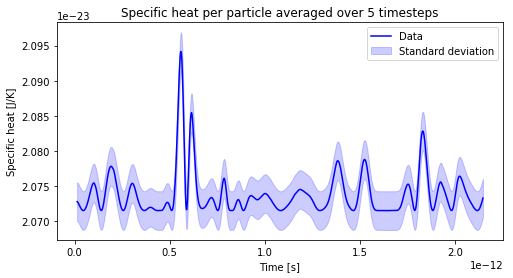

Mean specific heat (calculated differently) = 2.90e-23 [-] = 2.90e-23 [J/K]
Mean specific heat = 2.07e-23 [-] = 2.07e-23 [J/K]
Std  specific heat = 2.75e-26 [-] = 2.75e-26 [J/K]



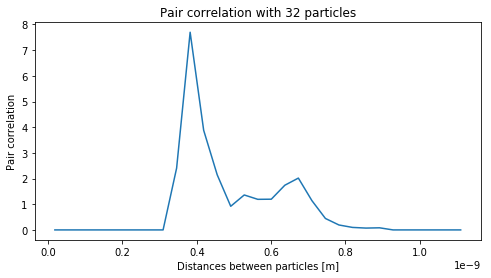

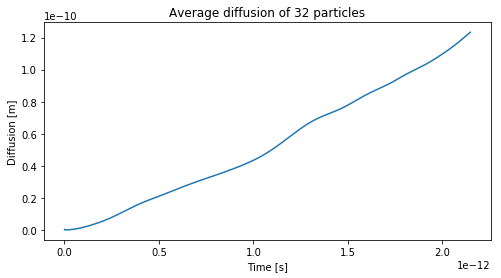

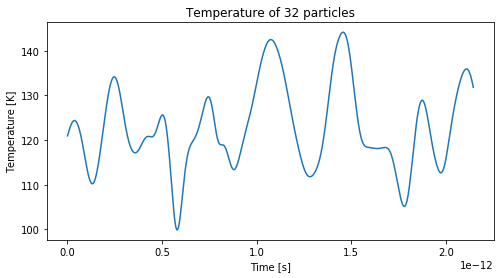


In natural units:
                     Density (set)   Temperature (set)   Temperature   Pressure (beta*P/rho)   Potential energy     Specific heat
   Values book (1)            0.88                 1.0          0.99                    2.98             -5.704   1.5 (Ideal gas)
   Values book (2)             0.8                 1.0          1.01                    1.31             -5.271   1.5 (Ideal gas)
   Values book (3)             0.7                 1.0         1.014                    1.06             -4.662   1.5 (Ideal gas)
        Our values        8.80e-01            1.00e+00      1.03e+00                4.45e+00          -5.07e+00          2.10e+00


In [3]:
""" ------------------ CALCULATIONS ----------------- """
X, L_box = execute_calculations(density_ph, h_ph, T_init_ph,
                                T_final_ph, T_delta_ph, N_argon,
                                N_steps, N_steps_set_T, N_steps_av_E,
                                init_org, plot_unit)  


In [6]:
# PARTICLE BOX
# print("Visualization started...")
# animation = animate.make_3d_animation(L_box, X)
# HTML(animation.to_jshtml())